In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"  # GPU ID

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
#export
from exp.nb_databunch import *
from exp.fastai_imports import  *
from exp.amish_sites import *

In [5]:
#export
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch
from exp.nb_databunch import *
from exp.fastai_imports import  *
from exp.amish_sites import *

class AmishDataset(Dataset):

    def __init__(self, items, df, pathologies,csv_file=None, transform=None,index_col='CASE_ID',data_type=None,cov=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            items (list): list of all imgs
            pathology (string): desired pathology
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        if(df is not None):
            self.df = df
        else:
            try:
                self.df = pd.read_csv(csv_file,index_col=index_col)
            except:
                print('Warning no data-frame was provided!')
                self.df=None
                
        self.items = items
        self.pathologies = pathologies
        self.transform = transform
        self.index_col = index_col
        self.pred_i = 0
        self.data_type=data_type
        self.cov = cov
    
    def filter_by_func(self,func):
        self.items = [f for f in self.items if(func(f))]
        return self
        
    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.items[idx]
        
        # 3 steps: 1. read image, 2. copy 3x, 3. convert to pillow image
        image = io.imread(img_name)
        if self.transform:
            image = self.transform(image)
        
        pheno = getMlutiLabel(img_name,self.pathologies,self.df,self.data_type)
        if(self.pathologies!='eye'): pheno = pheno.astype(np.float32)
        if(isinstance(pheno,pd.Series)): pheno = pheno.values
 
 
        # return sample
        return image, pheno
    
    def show_preds(self,preds=None,n=9,pred_i=None,label_preds=None):
        r,c = int(np.ceil(np.sqrt(n))),int(np.round(np.sqrt(n)))
        fig,axes = plt.subplots(r,c,figsize=(4*c,4*r))
        
        i_start = self.pred_i if pred_i is None else pred_i
        self.pred_i = i_start + n
        
        for i,ax in enumerate(axes.ravel()):
            img_t = self[i+i_start][0]
            img_true = self[i+i_start][1]
            img_p = [f'{p:.3f}' for p in preds[i+i_start]] if label_preds is None else label_preds[i+i_start] 
            
            ax.imshow(img_t.data.numpy()[0],cmap='gray')
            ax.set_title(f'{i+i_start}: {img_true} / {img_p}')  


In [6]:
!python notebook2script.py AmishDataLoaders.ipynb

Converted AmishDataLoaders.ipynb to exp/nb_AmishDataLoaders.py


In [7]:
a = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']

for s in [1,2,3,4,5,7,9]:
    
    a = list(range(97))
    n=len(a)


    print(s)
    m = n//2
    

    n2=n
    a=a[m-n2//2:m+1+n2//2]
    print(a)
    print()


    m=len(a)//2
    print(a[m])
    
    b=a[m::s]
    c = a[:m+1][::-1][::s][::-1][:-1]

    n3 = np.ceil((n2//2+1)/s)
    n4 = 2*n3-1
    print(c+b, len(c+b),n4)
    print(b)
    print(c)
    print()

1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]

48
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96] 97 97.0
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

In [8]:
b = []
n=0
for i in range(4):
    a = []
    for j in range(3):
        n+=1
        a.append(n)
    b.append(a)

c = np.array(b+[[]])[:-1]
c

array([list([1, 2, 3]), list([4, 5, 6]), list([7, 8, 9]), list([10, 11, 12])], dtype=object)

In [9]:
# export
def permuteList(l,seed=42):
    np.random.seed(seed)
    n = len(l)
    
    l_arr = np.array(l+[[]])[:-1]
    perm = np.random.permutation(n)
    np.random.seed()

    return list(l_arr[perm])



In [10]:
#export

from itertools import groupby 
from multiprocessing import Process
import multiprocessing
import torchvision.transforms.functional as TF
import PIL
import torchvision.transforms as transforms


class AmishVolumeDataset(AmishDataset):
    """pass in a list of volume ids"""
    def __init__(self, items, df, pathologies, csv_file=None, do_transform=True,unif_transform=True,index_col='CASE_ID',n_workers=1,
                resize=None,
                rcrop_size=None,
                rotation=None,
                hflip=None,
                contrast=False,
                n_slices=None,
                tiled=False,
                classification=False,
                mode='train',
                data_type = None,
                cov = None,
                slice_dsamp=1,
                group_func = lambda f: f.name.split('_')[:4],
                sort_key=None
                 
                ):
        
        super().__init__(items, df, pathologies,csv_file, transform,index_col)
        self.items.sort(key=sort_key)
        self.img_items = self.items
        self.items = [list(i) for j, i in groupby(self.items,group_func)]
        self.n_workers = n_workers
        self.resize = resize
        self.rcrop_size = rcrop_size
        self.rotation = rotation
        self.hflip = hflip
        self.contrast = contrast
        self.unif_transform = unif_transform
        self.n_slices = n_slices
        self.tiled = tiled
        self.do_transform = do_transform
        self.classification = classification
        self.mode = mode
        self.csv_file=csv_file
        self.data_type = data_type
        self.cov = cov
        self.slice_dsamp = slice_dsamp
        
        if(mode=='train'):
            self.tfms = compose( [transforms.RandomCrop(self.rcrop_size),
                                 transforms.RandomRotation(self.rotation),
                                 transforms.RandomHorizontalFlip()]
                              )
        
        
    
    def get_rand_params(self,image):
        
        if(self.rcrop_size is not None):
            self.crop_params = transforms.RandomCrop.get_params(transforms.Resize(size=self.resize)(image), output_size=self.rcrop_size)
        if(self.rotation is not None):
            self.rand_angle = transforms.RandomRotation.get_params(self.rotation)
        if(self.hflip is not None):
            self.rand_flip = random.random() > 0.5
    
    def _transform(self,slices):
        # Resize
        if(self.resize is not None):
            slices = [transforms.Resize(size=self.resize)(image) for image in slices]
            
        #contrast
        if(self.contrast):
            slices = [pil_contrast_strech()(image) for image in slices]
        
        if(self.mode=='train'):
            if self.do_transform:    
                if self.unif_transform: # different randomized trnasformation for each slice
                    self.get_rand_params(slices[0])
                    slices = [self.u_transform(image) for image in slices]
                else:  # different randomized trnasformation for each slice
                    slices = [self.tfms(image) for image in slices]
                
        return [TF.to_tensor(image) for image in slices]
        
        
    def u_transform(self, image):
        
        #crop
        if(self.rcrop_size is not None):
            image = TF.crop(image,*self.crop_params)
        
            
        #rotate
        if(self.rotation is not None):           
            image = TF.rotate(image, self.rand_angle)

        #flip
        if(self.hflip is not None):
            if(self.rand_flip):
                image = TF.hflip(image)

        return image

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # get idx
        vol_list = self.items[idx]
        vol_list.sort(key=lambda f: int(f.stem.split('_')[-1]))
        img_name = vol_list[0]
        
        # grab desired slices
        if(self.n_slices is not None):
            m = len(vol_list)//2
            vol_list = vol_list[m-self.n_slices//2:m+1+self.n_slices//2]
            
        if(self.slice_dsamp>1): #down sample resolution
            n_slice = len(vol_list)
            m = n_slice//2
            
            upper= vol_list[m::self.slice_dsamp]
            lower= vol_list[-m::-self.slice_dsamp][::-1][:-1]
            vol_list = lower + upper
              
        #open imgages
        slices = [PIL.Image.open(i) for i in vol_list]
        
        # transfrom (resize, crop, rotate  ,contrast, etc.)
        slices = self._transform(slices)
            
        # reshape
        if(self.tiled):
            v = torch.cat(slices,dim=1) 
            v = torch.stack([v,v,v]).squeeze()
        else:
            v = torch.stack(slices).squeeze()      
        
        # grab target
        pheno = getMlutiLabel(img_name,self.pathologies,self.df,self.data_type)
        if(self.pathologies=='eye'):
            pheno = np.array([0,1],dtype=np.float32) if(pheno=='OD') else np.array([1,0],dtype=np.float32)
        else:
            pheno = pheno.astype(np.float32)
            if(isinstance(pheno,pd.Series)): pheno = pheno.values
            elif(self.classification): pheno = np.array([0,1],dtype=np.float32) if(pheno) else np.array([1,0],dtype=np.float32)
        
        # add covariants
        if(self.cov is not None):
            v_cov = getMlutiLabel(img_name,self.cov,self.df,self.data_type)
            v = (v,v_cov.astype(np.float32).values)
        
        return v, pheno

    def filter_by_func(self,func):
        self.items = [vl for vl in self.items if(func(vl[0]))]
        return self
    
    @staticmethod
    def flatten(l):
        return [item for sublist in l for item in sublist]

    def split_dataset(self,shuffle_dataset=False, pct=0.2,random_seed=None):
        dataset_size = len(self.items)
        indices = list(range(dataset_size))
        split = int(np.floor(pct * dataset_size))
        if shuffle_dataset :
            np.random.seed(random_seed)
            np.random.shuffle(indices)
        train_indices, val_indices = indices[split:], indices[:split]

        train_items = self.flatten(np.array(self.items)[train_indices])
        val_items = self.flatten(np.array(self.items)[val_indices])


        ds_tr = AmishVolumeDataset(train_items, 
                                    df=self.df, 
                                    pathologies=self.pathologies,
                                    csv_file=self.csv_file, 
                                    do_transform=self.do_transform,
                                    unif_transform=self.unif_transform,
                                    index_col=self.index_col,
                                    n_workers=self.n_workers,
                                    resize=self.resize,
                                    rcrop_size=self.rcrop_size,
                                    rotation=self.rotation,
                                    hflip=self.hflip,
                                    contrast=self.contrast,
                                    n_slices=self.n_slices,
                                    tiled=self.tiled,
                                    classification=self.classification,
                                    mode='train',
                                    data_type=self.data_type,
                                    cov = self.cov,
                                    slice_dsamp = self.slice_dsamp
                                  )

        ds_tst = AmishVolumeDataset(val_items, 
                                    df=self.df, 
                                    pathologies=self.pathologies,
                                    csv_file=self.csv_file, 
                                    do_transform=self.do_transform,
                                    unif_transform=self.unif_transform,
                                    index_col=self.index_col,
                                    n_workers=self.n_workers,
                                    resize=self.resize,
                                    rcrop_size=self.rcrop_size,
                                    rotation=self.rotation,
                                    hflip=self.hflip,
                                    contrast=self.contrast,
                                    n_slices=self.n_slices,
                                    tiled=self.tiled,
                                    classification=self.classification,
                                    mode='test',
                                    data_type=self.data_type,
                                    cov = self.cov,
                                    slice_dsamp = self.slice_dsamp
                                   )


        return ds_tr, ds_tst


class  pil_contrast_strech(object):
    def __init__(self,low=2,high=98):
        self.low,self.high = low,high
        
    def __call__(self,img):
        # Contrast stretching
        img=np.array(img)
        plow, phigh = np.percentile(img, (self.low, self.high))
        return PIL.Image.fromarray(exposure.rescale_intensity(img, in_range=(plow, phigh)))
    
    def eye2array(pheno):
        np.array([0,1],dtype=np.float32) if(pheno=='OD') else np.array([1,0],dtype=np.float32) if(pheno=='OS') else np.array([-1,-1])

In [5]:
# export
def split_dataset(dataset, batch_size=64, 
                  num_workers=4, shuffle_dataset=False, pct=0.2,random_seed=None):
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(pct * dataset_size))
    if shuffle_dataset :
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_indices, val_indices = indices[split:], indices[:split]

    # Creating PT data samplers and loaders:
    train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
    valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)
    
    

    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                               sampler=train_sampler)
    validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                    sampler=valid_sampler)
    
    return train_loader, validation_loader





In [153]:
!python notebook2script.py AmishDataLoaders.ipynb

Converted AmishDataLoaders.ipynb to exp/nb_AmishDataLoaders.py


In [58]:
cat_cols?

In [6]:
amish_csv = 'AMISH_SO_QC.csv'
amish_df = pd.read_csv(amish_csv,index_col='CASE_ID')
data_path =  Path('./miami_imgs_e2e_par_full/Cube/')

amish_df = validateNumerical(amish_df)
amish_df = binarizeDataFrame(amish_df,cat_cols)
files_list= get_files(data_path,extensions='.tiff',recurse=True)

In [41]:
pathologies = ["SO_SRTSRHRM", "SO_INTRA_RCS",
           "SO_OUTER_RT", "SO_SR_DRUSEN", "SO_HRF_IRHRFOND", "SO_HRF_HRFOD",
           "SO_PED_DPED", "SO_PED_HPED",'CO_RPE_A3MM','CO_RPE_A5MM','CO_RPE_V3MM','CO_RPE_V5MM']

#pathologies = ['CO_RPE_A3MM','CO_RPE_A5MM','CO_RPE_V3MM','CO_RPE_V5MM']

In [42]:
isInAmishDf = partial(isInDf,df=amish_df)
areValidpathologiesLabels = partial(areValidLabels,pathologies=pathologies,df=amish_df)
isValidLabelPathology =  partial(isValidLabel,pathology=pathologies)

# single

In [102]:
pathologies = ['SO_SRTSRHRM','SO_SRTSRHRM','SO_INTRA_RCS']

ds = (AmishDataset(files_list,df=amish_df,pathologies=pathologies)
    .filter_by_func(lambda f: 'Line' in f.name)
    .filter_by_func(lambda f: 'Unknown' not in f.name)
    .filter_by_func(isInAmishDf)
    .filter_by_func(areValidpathologiesLabels))

In [103]:
ds[0]

(Array([[255,   2,   0,   0, ...,   0,   0,   0,   0],
        [255,   4,   0,   0, ...,   8,   5,   9,   5],
        [255,   0,   0,   0, ...,   6,   0,   8,  10],
        [255,   2,   0,   4, ...,   0,   0,  10,   6],
        ...,
        [255,   0,   0,   0, ...,   0,   0,   0,   1],
        [255,   0,   0,   0, ...,   0,   0,   0,   0],
        [255,   0,   0,   0, ...,   0,   1,   0,   1],
        [255,   0,   0,   1, ...,   1,   1,   0,   1]], dtype=uint8),
 SO_SRTSRHRM_OD     0
 SO_SRTSRHRM_OD     0
 SO_INTRA_RCS_OD    0
 Name: 5058_0102_09082015, dtype: object)

# Volume

In [43]:

ds = AmishVolumeDataset(files_list,df=amish_df,pathologies=pathologies,n_workers=-1,
                        resize=(256,256),
                        rcrop_size=(224,224),
                        rotation=(-10,10),
                        do_transform=True,
                        unif_transform=False,
                        contrast=True,
                        hflip=True,
                        n_slices=7,
                        tiled=True,
                        mode='train'
                       )

ds = (ds.filter_by_func(isInAmishDf)
        .filter_by_func(lambda f: 'Unknown' not in f.name)
        .filter_by_func(lambda f: 'ERROR' not in f.name)
        .filter_by_func(areValidpathologiesLabels))

miami_imgs_e2e_par_full/Cube/5001_0101_10292013_OS_Cube_0.tiff : SO_PED_HPED : nan
miami_imgs_e2e_par_full/Cube/5001_9018_09032014_OD_Cube_0.tiff : SO_SR_DRUSEN : nan
miami_imgs_e2e_par_full/Cube/5006_9002_03092016_OS_Cube_0.tiff : SO_PED_DPED : nan
miami_imgs_e2e_par_full/Cube/5010_0001_01312014_OD_Cube_0.tiff : SO_INTRA_RCS : nan
miami_imgs_e2e_par_full/Cube/5011_9003_03192014_OD_Cube_0.tiff : SO_SR_DRUSEN : nan
miami_imgs_e2e_par_full/Cube/5011_9003_03192014_OS_Cube_0.tiff : SO_SR_DRUSEN : nan
miami_imgs_e2e_par_full/Cube/5012_9001_08102016_OS_Cube_0.tiff : SO_SR_DRUSEN : nan
miami_imgs_e2e_par_full/Cube/5016_0001_02122014_OD_Cube_0.tiff : CO_RPE_A3MM : nan
miami_imgs_e2e_par_full/Cube/5018_0001_04222014_OD_Cube_0.tiff : SO_OUTER_RT : nan
miami_imgs_e2e_par_full/Cube/5019_0106_05212014_OD_Cube_0.tiff : SO_SR_DRUSEN : nan
miami_imgs_e2e_par_full/Cube/5019_0106_05212014_OS_Cube_0.tiff : SO_SR_DRUSEN : nan
miami_imgs_e2e_par_full/Cube/5020_0100_06172014_OD_Cube_0.tiff : SO_PED_DPED : n

In [44]:
tr,tst = ds.split_dataset()

In [45]:
len(tr),len(tst)

(601, 150)

In [52]:
# Check for NaN

for i in range(len(tr)):
    V,p = tr[i]
    if(np.isnan(p).sum()):
        print(i)
        print(p)
    

In [53]:
print(V.shape)
p

torch.Size([3, 1568, 224])


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

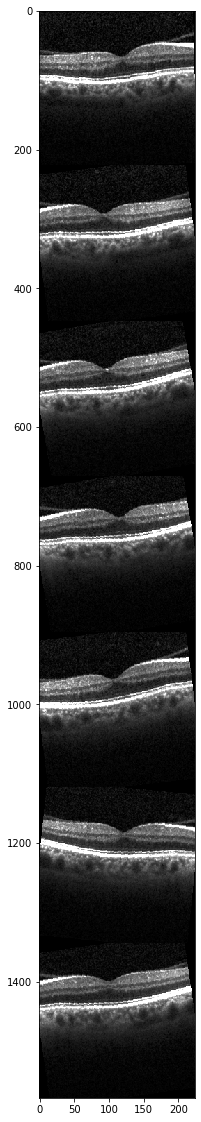

In [35]:
fix,ax = plt.subplots(figsize=(5,20))
ax.imshow(V.data.numpy()[0],cmap='gray')

torch.Size([3, 1792, 256])


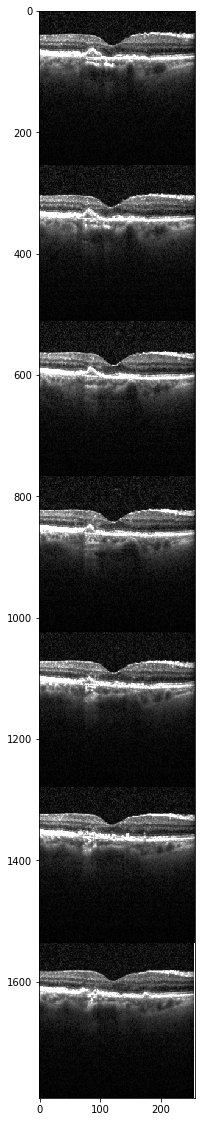

In [14]:
V,p = tst[0]
print(V.shape)
p
fix,ax = plt.subplots(figsize=(5,20))
ax.imshow(V.data.numpy()[0],cmap='gray')

In [15]:
dl = DataLoader(ds,batch_size=2)

In [16]:
# %debug
x,y = next(iter(dl))

In [17]:
x.shape

torch.Size([2, 3, 1568, 224])

In [17]:
y

tensor([[0., 0., 0., 1., 1., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0.]], dtype=torch.float64)

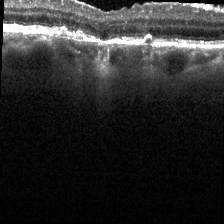

In [45]:
# %debug
transforms.ToPILImage()(V[40])

# MISC 

In [70]:
trtmp = []
for i in tr:
    trtmp.append(getPatID(i)[0])
    
trtmp= list(set(trtmp))


tstmp = []

for i in tst:
    tstmp.append(getPatID(i)[0])
    
tstmp= list(set(tstmp))

[i for i in trtmp if i in tstmp]

In [16]:
filter_funcs = [isInAmishDf,lambda f: 'Line' in f.name]

filter_funcs = [partial(filter_list,func=func) for func in filter_funcs]

In [27]:
compose(filter_funcs)(files_list)

[PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0360_0005_03262015_OD_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0321_0016_01072016_OS_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0064_0015_01292015_OD_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0538_0004_03102016_OS_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0914_0008_02132015_OD_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0901_0006_02262015_OS_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0268_0006_03062014_OS_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0474_0012_02252016_OS_Line_0.tiff'),
 PosixPath('/opt/data/workingdir/nrakocz/oct/upen_imgs_e2e_par_full/Line/0885_0008_02032016_OS_Line_0.tiff'),
 PosixPath